# Aim

Random clutter that I don't want in the other notebooks.

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize, stats, special
import pandas as pd
from tqdm.notebook import tqdm
import emcee
import corner
%matplotlib inline

In [3]:
comp04m = np.load('ballard_data/Completeness_0.4Msun.npy')

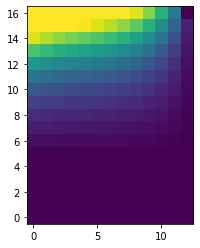

In [4]:
plt.imshow(comp04m[-1], origin='lower')

In [5]:
comp04m[-1,-1]

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.9515654 , 0.81322575,
       0.63385886, 0.4052323 , 0.001     ], dtype=float32)

In [6]:
num_iters = 100
rcomp_marginalized = np.mean(comp04m[-1].dot(np.random.uniform(size=(13,num_iters))), axis=1)
rcomp_marginalized /= rcomp_marginalized[-1]
pcomp_marginalized = np.mean(comp04m[-1].T.dot(np.random.uniform(size=(17,num_iters))), axis=1)
pcomp_marginalized /= pcomp_marginalized[0]

Text(0.5, 0.98, 'Search completeness fraction in period/radius separately (from data)')

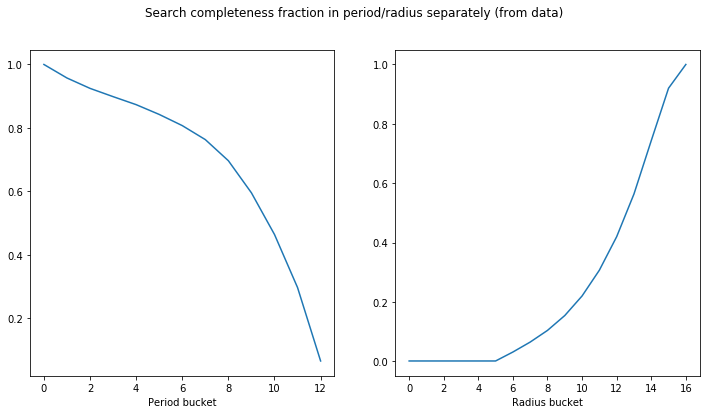

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.plot(pcomp_marginalized)
ax1.set_xlabel("Period bucket")
ax2.plot(rcomp_marginalized)
ax2.set_xlabel("Radius bucket")
plt.suptitle("Search completeness fraction in period/radius separately (from data)")

[]

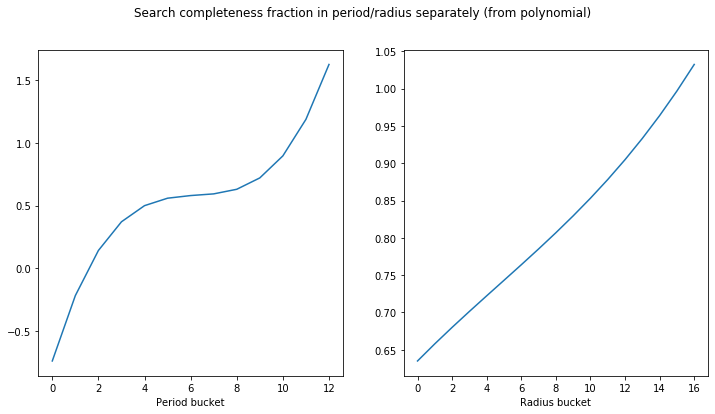

In [29]:
rng_p = np.array([0.5, 200])
rng_r = np.array([0.5, 4])
num_bins_p = 13
num_bins_r = 17
bins_p = np.e ** (np.linspace(*np.log(rng_p), num_bins_p))
bins_r = np.e ** (np.linspace(*np.log(rng_r), num_bins_r))
comp_poly = lambda x, a1, a2, a3, a4: a4 + a1 * x + (a1 * a2) * x ** 2 + (a1/3) * (a2**2 + a3**2) * x ** 3
params = np.array([0.75, -0.4, 0.07, -0.06, 0.16, 0.03, 0.6, 0.75])# * np.log(10)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.plot(comp_poly(np.log(bins_p), *params[:4]))
ax1.set_xlabel("Period bucket")
ax2.plot(comp_poly(np.log(bins_r), *params[4:]))
ax2.set_xlabel("Radius bucket")
plt.suptitle("Search completeness fraction in period/radius separately (from polynomial)")
plt.plot()